<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="../Log_SA.jpeg"></a>

Instructor and author: [_Dr. Junaid Qazi_](https://www.linkedin.com/in/jqazi/)

# Decision Tree and Random Forests - Hands-on 

## Heart Disease Data Set -- Cleveland data
Hi Guys,<br>

Welcome to the Decision Tree and Random Forests (Hands-on) lecture using scikit-learn in Python. <br>

After learning key concepts of Decision Tree and Random Forests in the theory lecture, let's move on and work with another famous dataset on [Heart Disease in Cleveland](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). This original and full dataset is a part of [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) and contains 4 databases: ***Cleveland, Hungary, Switzerland, and the VA Long Beach.*** This dataset was donated to UCI Repository in 1988.<br>
The original database contains 76 attributes, but all published experiments by machine learning researchers refer to using a subset of 14 of them. <br>
In particular, the **Cleveland database** is the only one that has been used by the Machine Learning researchers to this date. In the original database, the `"goal"` field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).<br>

We are also using Cleveland database in this lecture. You can download the original one from the UCI website or use the one provided along with this course. *I recommend using the one provided in the curse material because it is already cleaned for the missing data. A new column 'target' is also added with N (for 0) and Y (for 1,2,3,4).*<br>

If you are interested to know more about the databases, please visit the link provided at the beginning.<br>
Information on 14 attribute, that we are going to use, is provided below: 

* **age**--in years
* **sex**--(1 = male; 0 = female)
* **cp**--chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal, pain 4: asymptomatic)  
* **trestbps** -- resting blood pressure
* **chol**--serum cholesterol in mg/dl
* **fbs**--fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* **restecg**--resting ecg (electrocardiographic) results
* **thalach**--maximum heart rate achieved in beats per minute (bpm) 
* **exang**--exercise induced angina (1 = yes; 0 = no)
* **oldpeak**--ST depression induced by exercise relative to rest 
* **slope**--the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping) 
* **ca**: number of major vessels (0-3) colored by flourosopy 
* **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect. <br>*(Thal represents "β-Thalassemia", which is an inherited hemoglobin disorder resulting in chronic hemolytic anemia that typically requires life-long transfusion therapy)* 
* **the predicted attribute** (0, 1, 2, 3 4) -- In the processed dataset, this one is added as a new column 'target' with 'N' for 0 and 'Y' for 1,2,3 & 4.<br>

Let's move on to the jupyter notebook and learn by doing.

**Let's import the libraries and learn by doing!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Reading the data file in dataframe `"df"`**

In [2]:
data_url="""https://raw.githubusercontent.com/junaidqazi/\
DataSets_Practice_ScienceAcademy/master/HD_Cleveland_Data_Clean.csv"""
df = pd.read_csv(data_url)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slop      297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


Let's have a quick overview on the feature's summary before we move on for EDA. Recall `describe()`. You are already familiar with this function, it's good idea to look at the output to think about the distributions in the features, you have max, min, std and much more in the output!!

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


### Exploratory Data Analysis (EDA) -- only few plots

In [6]:
# Let's see how many positive and negative cases we have!
df['target'].value_counts()

N    160
Y    137
Name: target, dtype: int64

In [7]:
#If you are interested in pair plot, it's big so I am just avoiding this!
#sns.pairplot(data=df[['age','sex','chol','fbs','target']], hue='target')

<AxesSubplot:xlabel='target', ylabel='count'>

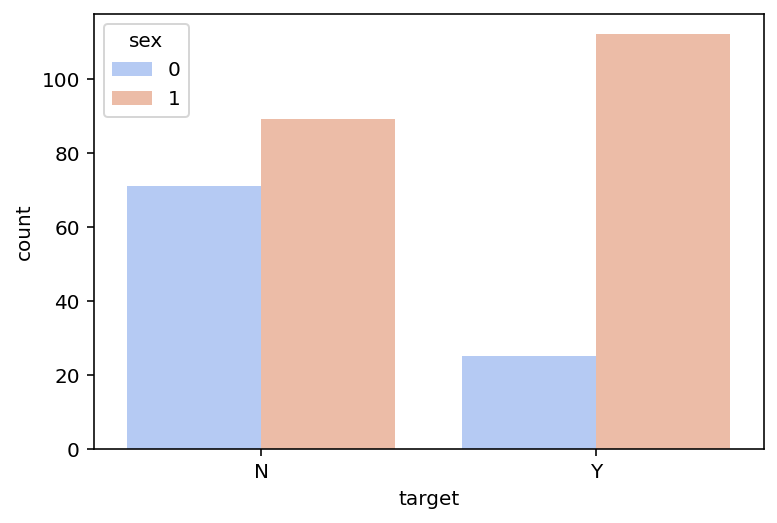

In [8]:
sns.countplot(x='target',data=df, hue='sex', palette='coolwarm')

Did you notice, most of the men were diagnosed with the heart disease! 

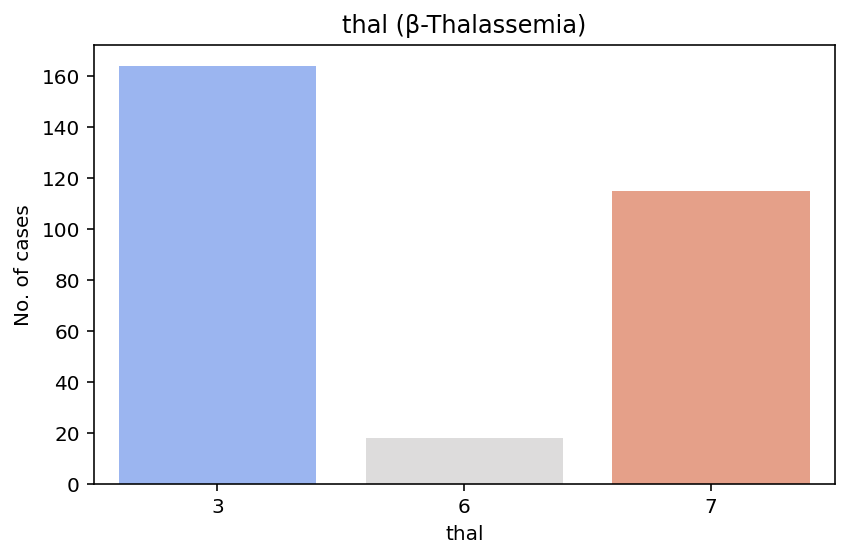

In [9]:
# thal is "β-Thalassemia"
# 3 is for normal, 6 for "fixed defect" and 7 for "reversable defect"
#plt.figure(figsize=(10,4)) #just for you guys to play with size!
sns.countplot(x='thal',data=df, palette='coolwarm')#, hue='sex')
plt.ylabel("No. of cases")
plt.title("thal (β-Thalassemia)")
plt.tight_layout() # we don't need it here, consider it just a reminder!

In most of the cases, thal (β-Thalassemia) was normal.

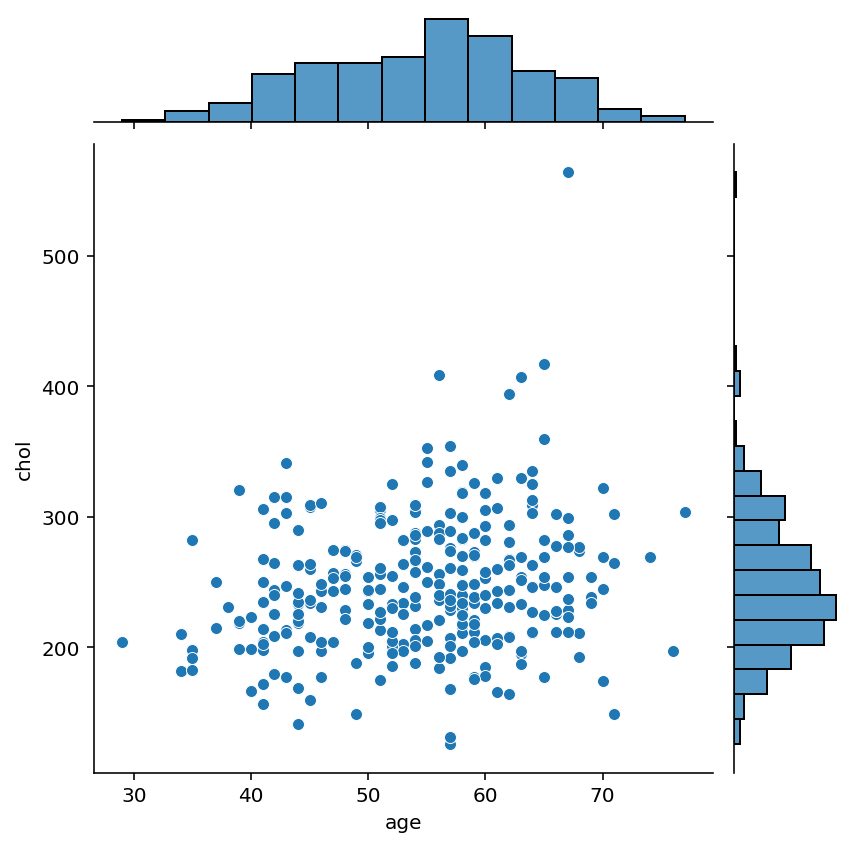

In [10]:
# Let's see how age is related to cholesterol, chol.
sns.jointplot(x='age', y='chol', data=df)

From the above pairplot, we can see some trends in increasing cholesterol with age.

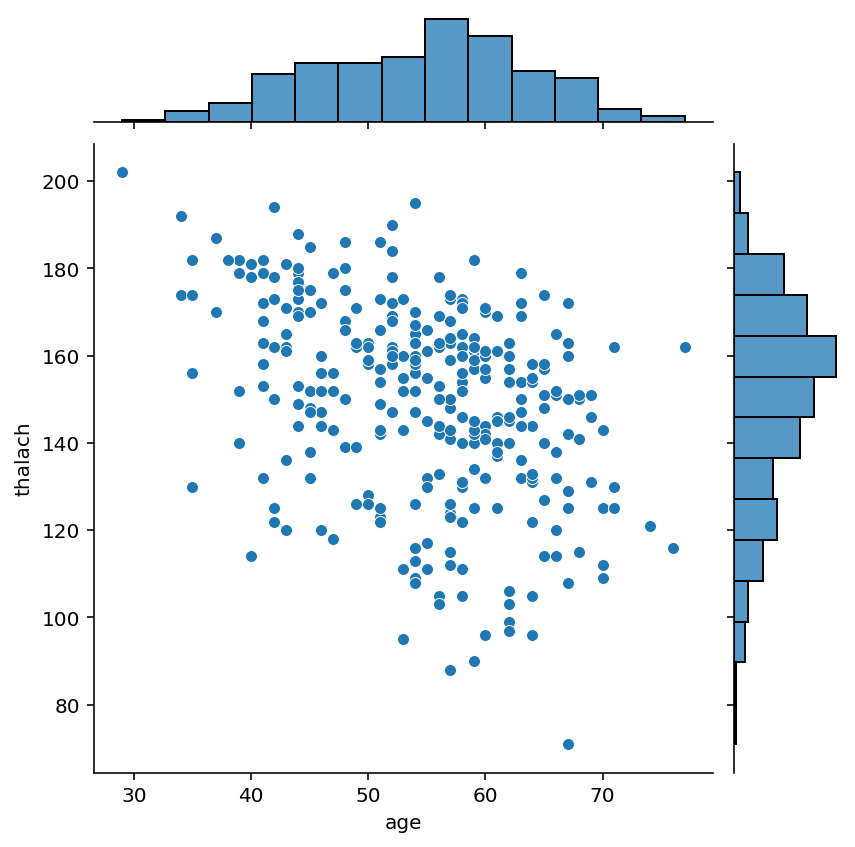

In [11]:
# thalach is the maximum heart rate achieved
sns.jointplot(x='age', y='thalach', data=df)

Do you see some trend in maximum hear rate and age? Does the value decreases with increasing age?<br>
Once again, more you know about your data, better you can suggest. Think about more plots and do more EDA. I will stop EDA and move on to the machine learning.

### Machine Learning Section
Having said, our focus is Machine Learning, lets split the data and move on to train the model.<br>
We will start with training a single decision tree and than compare the results with Random Forest but first, we need to do train_test_split!

**Train Test Split**<br>

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('target',axis=1) # X are features, need to drop target column
y = df['target'] # y is target!

In [14]:
# shift+tab and simply copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Decision Trees

We'll start with training a single decision tree!

In [15]:
# importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

Default splitting criterion is `gini`, I am just setting it to entropy (Information Gain is based on entropy). You can try `gini` on your own.  

In [16]:
#Creating instance "dtree" of the classifier 
dtree = DecisionTreeClassifier(criterion='entropy')

In [17]:
#fitting to the training data, the default parameters are fine at the moment!
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Notice, we are leaving everything default, other than criterion. We will come back to this in a while.  

### Prediction and Evaluation 

Evaluation is important to see how did the model work!

In [18]:
# doing predictions 
dtree_pred = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, dtree_pred))
print(confusion_matrix(y_test, dtree_pred))

              precision    recall  f1-score   support

           N       0.74      0.79      0.76        53
           Y       0.74      0.67      0.70        46

    accuracy                           0.74        99
   macro avg       0.74      0.73      0.73        99
weighted avg       0.74      0.74      0.74        99

[[42 11]
 [15 31]]


It looks like we are doing OK using decision tree, the model is mislabeling some!<br>
Well, we may be able to get better results using Random Forests.

## Random Forests
Let's try Random Forests model on the data and compare our results with the decision tree model. Random Forests is under ensemble class in the sklearn.

In [21]:
from sklearn.ensemble import RandomForestClassifier

We can pass in number of trees (n_estimators = 100) in the forest at the moment and fit the model to the training dataset.<br>
&#9758; *You can play with n_estimators by changing different numbers!* Let's leave everything else as default. 

In [22]:
# Creating instance and fitting the model
rfc = RandomForestClassifier(n_estimators=100)#
# try the line below and compare your results!
#rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=7)#, bootstrap=False)

In [23]:
# time to fit on training data set (X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

**Note:** Follow [this link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) if you want to learn more about the parameter in RandomForestClassifier. We have only passed the n_estimatores = 100, and this is the one we frequently use. The default values for all other parameters are considered.<br>


In [24]:
# doing predictions
rfc_pred = rfc.predict(X_test)

In [25]:
# Evaluation
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           N       0.81      0.87      0.84        53
           Y       0.83      0.76      0.80        46

    accuracy                           0.82        99
   macro avg       0.82      0.81      0.82        99
weighted avg       0.82      0.82      0.82        99

[[46  7]
 [11 35]]


It looks like the random forest gave us better results over a single tree for our dataset. We got the better precision, recall and f1-score using Random Forest and less number of mislabeled samples!<br>
You will see, if your dataset gets larger and larger, Random Forests will always do better than a single decision tree. In this current situation, out dataset is not very large but still Random Forests model works better than decision tree. Random Forests model will outshines with larger data sets. 

## Feature Importance 
Decision trees and Random Forests give us the importance of features while training the model. It's super easy and can be grabbed from trained model instance by using `feature_importances_` attribute.<br>
Let's write a function here, good to do some practice and in this way, we can re-use the code. It's completely fine to get your plot without writing function. Up to you!

Writing a function `feature_pot` so that we can get a nicer plot and re-use our code. Go through the code yourself and understand line-by-line. 

In [26]:
def feature_plot(coef, columns, y_title = 'coefficients'):
    feature_imp = pd.DataFrame(coef.T, columns = ['importance'])#features.columns)
    feature_imp['feature'] = columns
    feature_imp.sort_values(by = ['importance'], ascending = False, inplace = True)
    feature_imp.plot(x='feature', kind = 'bar', figsize = (16,4))
    plt.title(y_title)
    plt.ylabel(y_title);

In [27]:
# Lets separate the features  
features_names=df.columns[:-1]
features_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal'],
      dtype='object')

### Feature importance from our Decision Tree `"dtree"` model. 

In [28]:
dtree.feature_importances_

array([0.13967455, 0.02056145, 0.0987765 , 0.06679907, 0.10222026,
       0.01191739, 0.04029964, 0.10235624, 0.        , 0.07027789,
       0.        , 0.24647434, 0.10064268])

In our model, the importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the `Gini` importance (for default case).<br>
Want to know more, [click here please](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

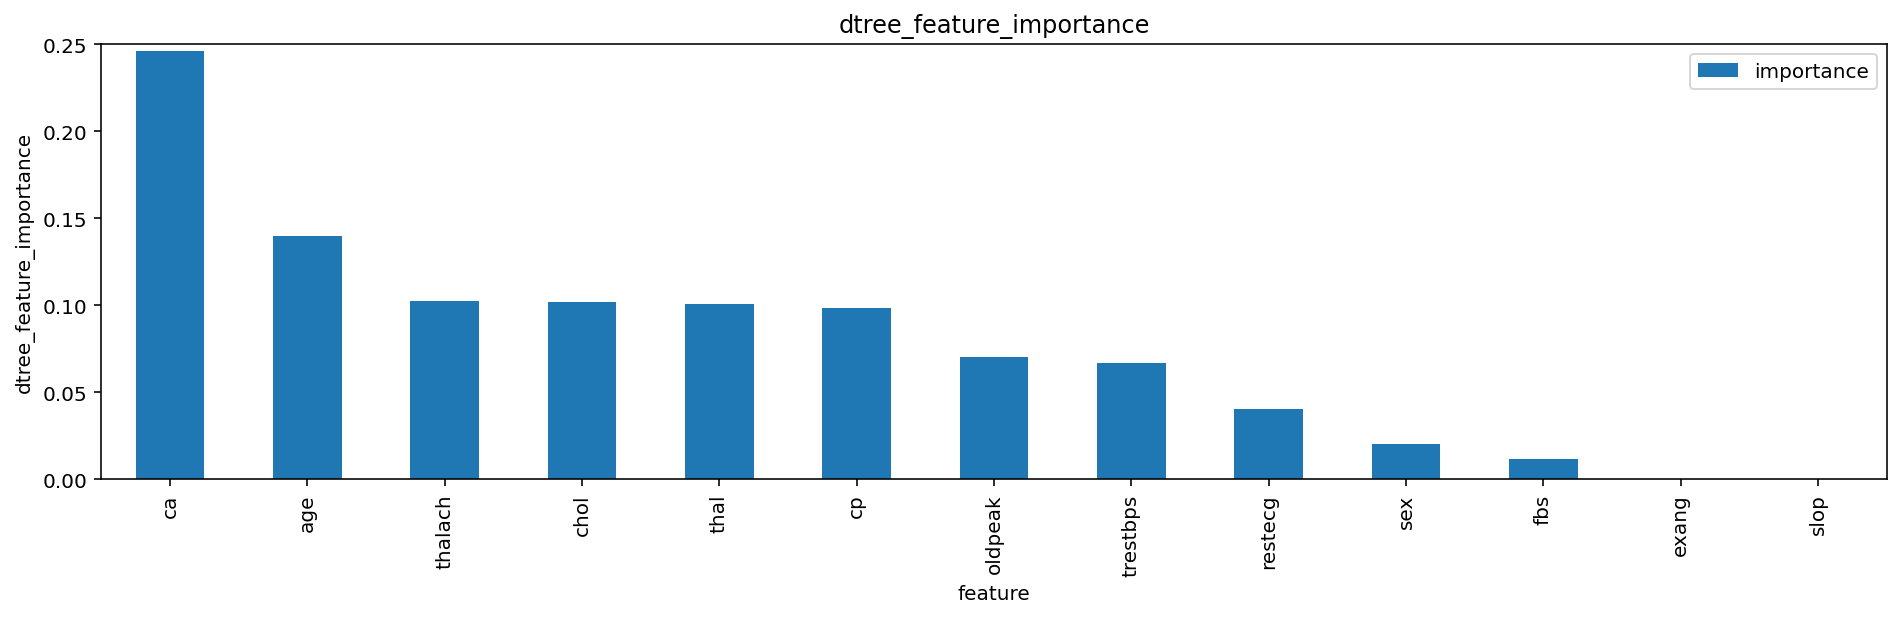

In [29]:
feature_plot(coef = dtree.feature_importances_, columns =features_names, 
             y_title = 'dtree_feature_importance')
plt.ylim(0,0.25);

### Feature importance from our Random Forests `"rfc"` model. 

Simply, we can using `feature_importance_` on our random forests instance `rfc` here, higher the value is, more important the feature will be.<br>
*In Random Forests, default `"gini"` approach or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportional to the number of samples it splits. Another commonly used approach for the tree split is calculating the Information Gain which depends upon entropy.*

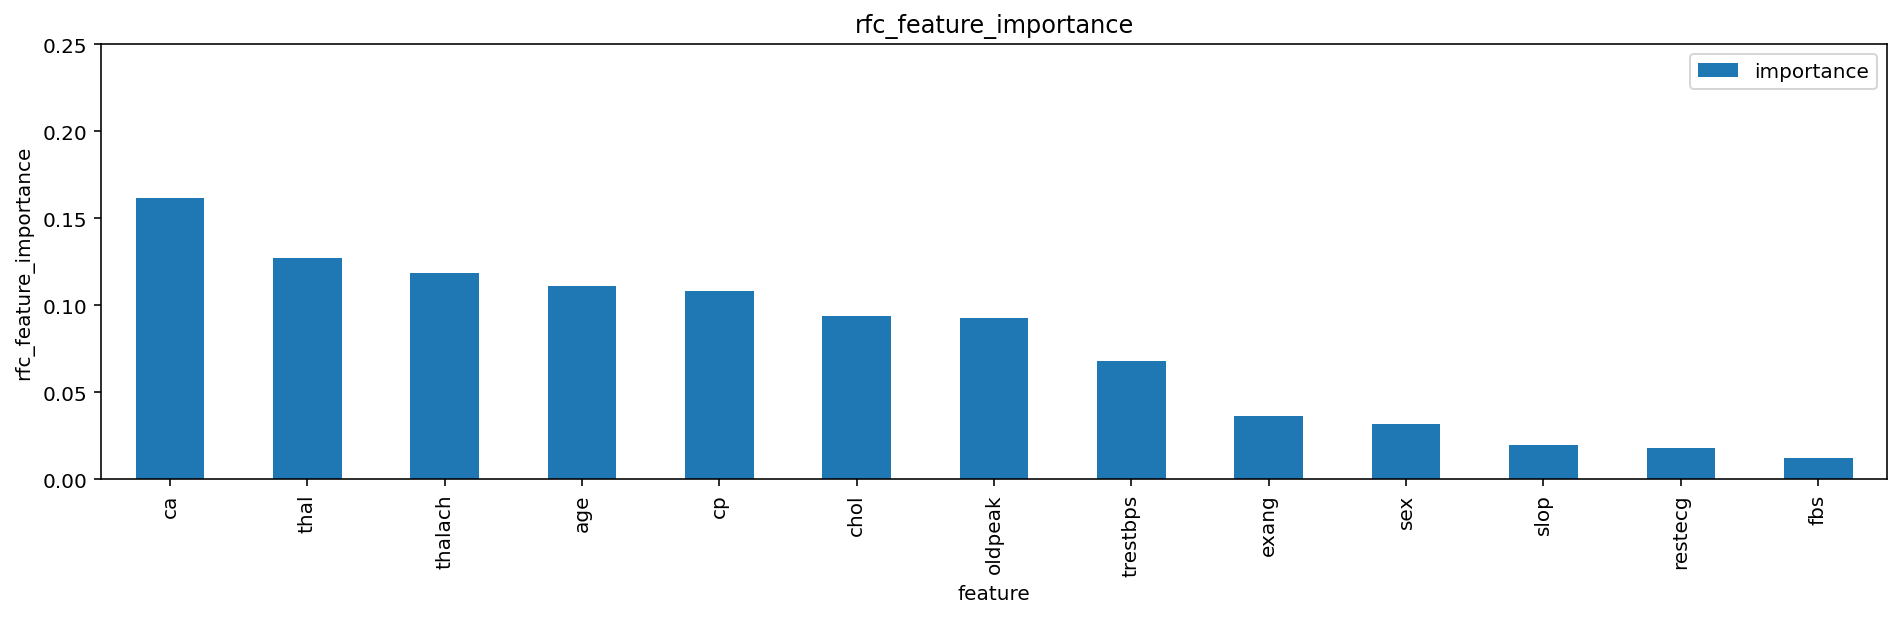

In [30]:
# single line code using our custom function 
feature_plot(rfc.feature_importances_, features_names, 'rfc_feature_importance')
plt.ylim(0,0.25);

## To Do:

* From the above feature importance plots, what do you learn? Do you see some change(de-correlation) in features for Random Forests? Do you see biased/greed selection of important features in Decision trees?
* In Decision Tree, we have used `entropy`, re-train your model using `gini` (default). In Random Forests, we have used `gini` (default), re-train your model using `entropy`. **Do you see any difference?**

## Hyper-parameters and their tuning to find the best model/estimator/classifier!

Now, we are at the point where I should be introducing little more complex and very useful practical concepts to you guys. Let's talk about `hyper-parameters` and their tuning. <br>
In a very simple language, a parameter is called `hyperparameter` if it's value is set before our we start training/learning process of our model/algorithm. *Tuning is simply finding the best set of these parameters.* Hyper-parameters are not directly learned within models, however, the values of other parameters are derived via training the model. <br>
Scikit-learn provides two commonly used approaches to search for the values of `hyper-parameters`: 
* `GridSearchCV`, which  consider all the combinations for the provided values.
* `RandomisedSearchCV`, which can sample a given number of candidate values from a parameter space with a specified distribution. 

It is important to note that both, the Randomized-Search and the Grid-Search, explore exactly the same space of parameters. As compared to the Grid-Search, Randomized-Search have drastically lower run. In terms of performance, it could be slightly lower, most likely a noise effect which would not carry over to a held-out test dataset. Another important thing to remember, in practice, it is recommended not to search for many different parameters simultaneously using Grid-Search, pick the ones that you think are the most important.

Compare randomized search and grid search for optimizing hyperparameters of a random forest. All parameters that influence the learning are searched simultaneously (except for the number of estimators, which poses a time / quality tradeoff).

**Comment**: *It is common that a small subset of hyper-parameters can have a significant impact on the predictive or computation performance of the model while others can be left to their default values. I recommend you guys to please read the `docstring` of the estimator or model class to understand their expected behavior in details.*

**Let's try both of these approaches to find the best combination of `hyper-parameters` and see if we can get further improvements from our Random Forests model.**

In [31]:
# importing time to see the time for our grid search
from time import time
# we are going to use the function below for random number generation
from scipy.stats import randint

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
# Creating model instnace with 20 trees in the forest.
rfc_RS = RandomForestClassifier(n_estimators=20) # rfc_RS for Randomizes-Search!

In [33]:
# specifing parameters and distributions to sample from for RandomizedSearchCV 
param_distributions = {"max_depth": [2, 3],# max. depth of the tree in Random Forests, try None in the list as well 
                       "max_features": randint(1, 13), # To do: Can you use np.random.randint? if not why? read documentation for both. 
                       "min_samples_split": randint(2, 13), # The minimum no. of samples required to split an internal node
                       #"bootstrap": [True, False], # we already know this! Refer to theory lecture
                       "criterion": ["gini", "entropy"]} # we know this as well!

In [34]:
# run randomized search
n_iter_search = 15 

Next step is to create instance for `RandomizedSearchCV` and pass in the model instance, parameters we want to search from, number of iterations we want along with cross validations (cv) etc!

In [35]:
random_search_rfc = RandomizedSearchCV(rfc_RS, param_distributions=param_distributions, 
                                   n_iter=n_iter_search, cv=5)#, iid=False)
# if iid = True, it return the average score across folds, weighted by the number of samples in each test set.

`random_search_rfc` will work the same way as the model, we can use it to fit on our training data and the to get the predictions for our test data!

In [36]:
start = time() # current time
random_search_rfc.fit(X_train, y_train) # training 
print("RandomizedSearchCV took {} seconds for {} iterations of searches on given parameter settings.".format(
    round((time() - start),2), n_iter_search))

RandomizedSearchCV took 1.44 seconds for 15 iterations of searches on given parameter settings.


Now, we have everything in `random_search_rfc`, most of the time we are interested to know settings for top few models, e.g. 3 or 5!<br>
Let's see how much information we can collect from `random_search_rfc`.

In [37]:
random_search_rfc.best_score_ # gives the best score

0.8187179487179488

In [38]:
random_search_rfc.best_estimator_ # gives the best model

RandomForestClassifier(criterion='entropy', max_depth=2, max_features=1,
                       min_samples_split=8, n_estimators=20)

In [39]:
random_search_rfc.best_params_ # gives the best parameters

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 1,
 'min_samples_split': 8}

`random_search_rfc.cv_results_` is a dictionary which contains all results, we can save all as a csv or test file of the one we need!

In [40]:
type(random_search_rfc.cv_results_) # checking the type

dict

Recall, we can grab the keys of any dictionary, let's check the keys of `random_search_rfc.cv_results_`

In [41]:
random_search_rfc.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

Wao, we have lots on information in `random_search_rfc.cv_results_`, we don't need all, we are only interested in the best parameters and the relevant score. Still, its good to see how the top few compare!<br>
I would prefer to write a utility function to print a report on top 5 results.<br> Let's do it! 

In [42]:
# Utility function to report best scores
def print_report(search_results, top_n = 2): # top 2 if top_n not given!
    
    # I want top 5, means 1 to 5, I need to start from 1 using range and add 1 in upper limit (top_n)
    for i in range(1, top_n + 1):
        
        # tow things:
        # Notice, you have 'rank_test_score' in keys above {random_search.cv_results_.keys()}
        # flatnonzero return indices that are non-zero in the flattened version
        # of array random_search_results['rank_test_score']
        rank = np.flatnonzero(search_results['rank_test_score'] == i)

        for val in rank: # val is the index location!
            print("Model rank: ", i)
            print("Mean validation score: {:.3f}".format(search_results['mean_test_score'][val]))
            print("std_test_score: {:.3f}".format(search_results['std_test_score'][val]))
            print("Parameters: {}\n".format(format(search_results['params'][val])))

In [43]:
print_report(random_search_rfc.cv_results_, 3)
# instead create a dataframe and save the results 

Model rank:  1
Mean validation score: 0.819
std_test_score: 0.061
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'min_samples_split': 8}

Model rank:  2
Mean validation score: 0.819
std_test_score: 0.050
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'min_samples_split': 9}

Model rank:  3
Mean validation score: 0.818
std_test_score: 0.055
Parameters: {'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_split': 5}

Model rank:  3
Mean validation score: 0.818
std_test_score: 0.036
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 4, 'min_samples_split': 8}



**Optional**: In case, we want to save the best parameters as text file:

In [44]:
# open file in write mode 'w'
with open('best_params.txt', 'w') as f:
    f.write(str(random_search_rfc.best_params_))

In [45]:
# open file in read mode 'r' and load the saved parameters
import ast # explore "ast"
with open('best_params.txt', 'r') as f:
    best_parameters = ast.literal_eval(f.read())

### Predictions and evaluations
Let's get the predictions from our trained model in `random_search`. it will use the best model for predictions! 

In [46]:
random_search_rfc_pred = random_search_rfc.predict(X_test)

In [47]:
print(confusion_matrix(y_test, random_search_rfc_pred))
print(classification_report(y_test, random_search_rfc_pred))

[[51  2]
 [19 27]]
              precision    recall  f1-score   support

           N       0.73      0.96      0.83        53
           Y       0.93      0.59      0.72        46

    accuracy                           0.79        99
   macro avg       0.83      0.77      0.77        99
weighted avg       0.82      0.79      0.78        99



### GridSearchCV
Let's quickly go through the `GridSearchCV` now. 

In [48]:
# Creating model instnace with 20 trees in the forest.
rfc_GS = RandomForestClassifier(n_estimators=20) # rfc_GS for Grid-Search!

In [49]:
# use a full grid over all parameters
param_grid = {"max_depth": [2, 3],# try adding None in the list
              "max_features": [3, 5, 13],
              "min_samples_split": [2, 3, 13],
              #"bootstrap": [True, False], # to do, try this in the search as see the difference!
              "criterion": ["gini", "entropy"]}

In [50]:
# run grid search
grid_search_rfc = GridSearchCV(rfc_GS, param_grid=param_grid, cv=5)#, iid=False)
start = time()
grid_search_rfc.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search_rfc.cv_results_['params'])))

GridSearchCV took 3.54 seconds for 36 candidate parameter settings.


In [51]:
print("Best score:", round((grid_search_rfc.best_score_),3))
print("Best params:", grid_search_rfc.best_params_)

Best score: 0.839
Best params: {'criterion': 'gini', 'max_depth': 2, 'max_features': 3, 'min_samples_split': 13}


In [52]:
grid_search_rfc_pred = grid_search_rfc.predict(X_test)

In [53]:
print(confusion_matrix(y_test, grid_search_rfc_pred))
print(classification_report(y_test, grid_search_rfc_pred))

[[50  3]
 [11 35]]
              precision    recall  f1-score   support

           N       0.82      0.94      0.88        53
           Y       0.92      0.76      0.83        46

    accuracy                           0.86        99
   macro avg       0.87      0.85      0.86        99
weighted avg       0.87      0.86      0.86        99



# ROC Curve

In the first attempt, we saw improvements using Random Forests. We then did hyper-parameter tuning. Now, we have three models based on Random Forests and their predicted classes.
* Model: **rfc** and the predicted classes for test data in: **rfc_pred**
* Model: **random_search_rfc** and the predicted classes for test data in: **random_search_rfc_pred**
* Model: **grid_search_rfc** and the predicted classes for test data in: **grid_search_rfc_pred**

We need to predict the probabilities from each model to get ROC.<br>
Let's do it!

In [54]:
# predicting probabilities for each model
rfc_prob = rfc.predict_proba(X_test)
random_search_rfc_prob = random_search_rfc.predict_proba(X_test)
grid_search_rfc_prob = grid_search_rfc.predict_proba(X_test)

In [55]:
# let's check our y_test 
y_test.head()

167    N
211    Y
63     N
154    Y
5      N
Name: target, dtype: object

So, our targets in `"y_test"` are in Y/N, we need to convert them 0/1. Its super easy, we can use a one line of code given belwo!<br>
*if you want, you can use if/else to assign codes in a loop, recall from the python section.*

In [56]:
y_test_01 = y_test.astype('category').cat.codes

In [57]:
y_test_01.head() # just to reconfirm

167    0
211    1
63     0
154    1
5      0
dtype: int8

Now, we have everything ready to computer ROC curve.

In [58]:
# Required imports from scikit-learn 
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
# Computing Area Under the ROC Curve from prediction scores.

ROC_area_rfc = roc_auc_score(y_test_01, rfc_prob[:,1]) 
ROC_area_random_search_rfc = roc_auc_score(y_test_01, random_search_rfc_prob[:,1]) 
ROC_area_grid_search_rfc = roc_auc_score(y_test_01, grid_search_rfc_prob[:,1]) 

print('Area Under Random Forests ROC Curve: %.3f' % ROC_area_rfc)
print('Area Under Random Search Random Forests ROC Curve: %.3f' % ROC_area_random_search_rfc)
print('Area Under Grid Search Random Forests ROC Curve: %.3f' % ROC_area_grid_search_rfc)

Area Under Random Forests ROC Curve: 0.900
Area Under Random Search Random Forests ROC Curve: 0.922
Area Under Grid Search Random Forests ROC Curve: 0.902


Now, from the above numbers on Are under ROC, we started seeing the difference, Hyper-parameter tuning helped to get better model!<br>
**Let's computer ROCs now!**

It is a good practice to think about re-using the code, let's write a function to plot nicer ROC curves!

In [60]:
def plot_rocs(y_test, prob, AUC_ROC, ax, title = 'title'):#, y_label = 'y_label', x_label = 'x_label'):
    """
    This is going to be our docstring! Good for your practice
    y_test = test data
    prob = predicted probabilities from our trained model
    AUC_ROC = Area Under ROC Curve
    ax = figure axis on which we want to put our plot
    title = given title
    """
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
    
    # plot no skill - A line for random guess
    ax.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    #plt.plot([0, 1], [0, 1], linestyle='--', label = 'Random guess' )
    
    # plot the roc curve for the model
    ax.plot(fpr, tpr, marker='.', label = 'ROC - Area Under The Curve: %.3f' % AUC_ROC)
    
    # let's set the limits (0,1)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # good to put title and labels
    ax.set_title(title)
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    
    # putting the legends  
    ax.legend();

Let's use the subplots to put ROCs side-by-side for easy comparisons. We need to pass y_test_01 (this is the one we converter from N/Y to 0/1), probabilities and ROC area under curve.

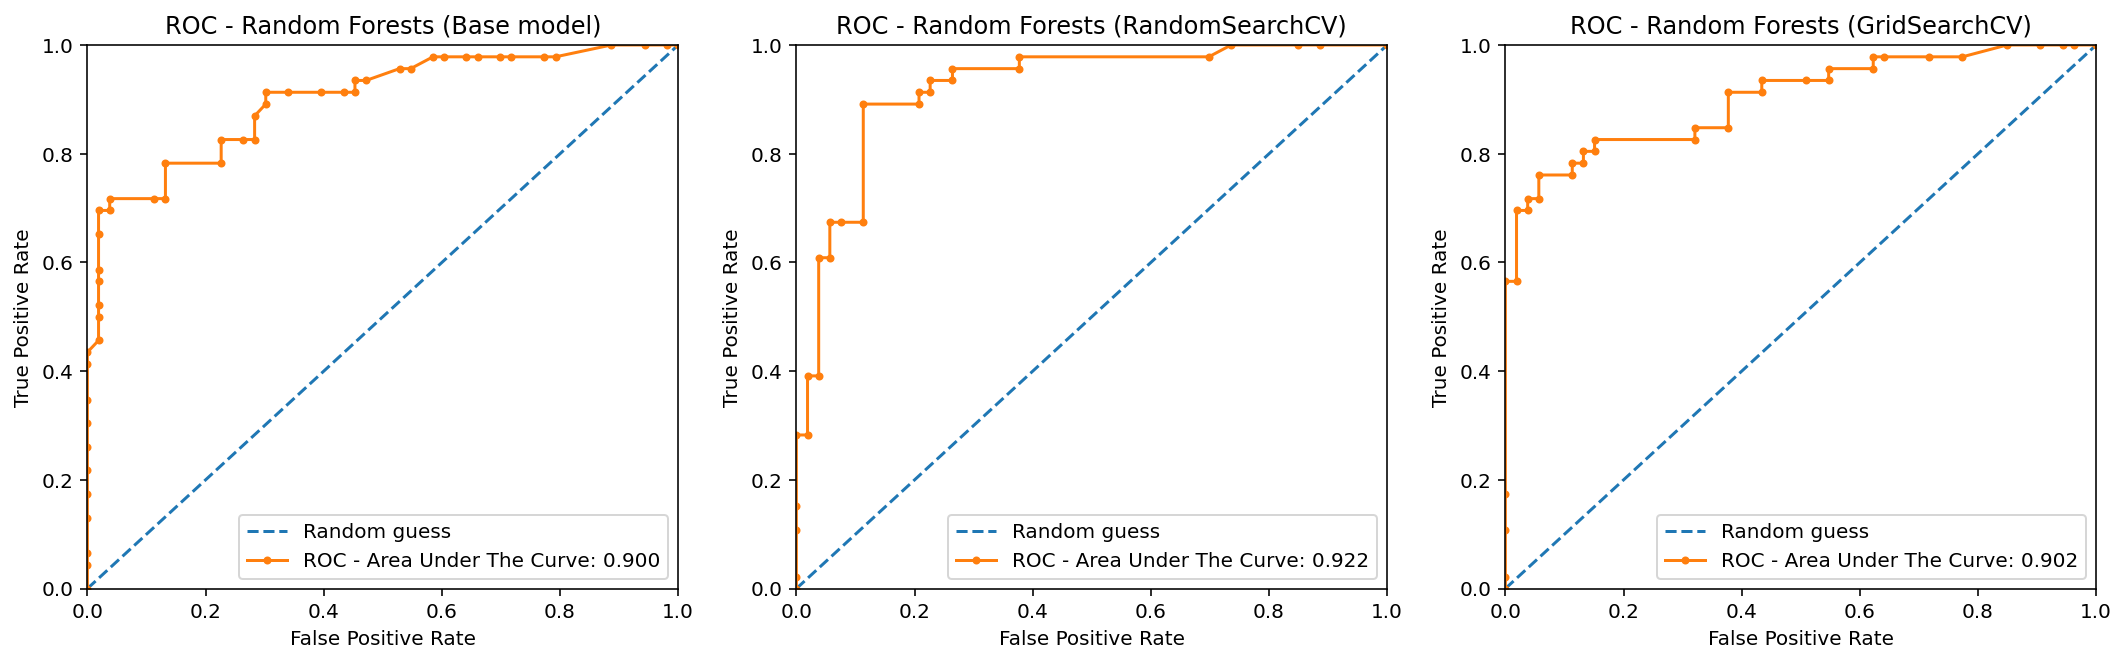

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

# Calling the above function to get ROC curves for each model
plot_rocs(y_test_01, rfc_prob, ROC_area_rfc, 
          ax[0], 'ROC - Random Forests (Base model)')

plot_rocs(y_test_01, random_search_rfc_prob, ROC_area_random_search_rfc,
          ax[1], 'ROC - Random Forests (RandomSearchCV)')

plot_rocs(y_test_01, grid_search_rfc_prob, ROC_area_grid_search_rfc, 
          ax[2], 'ROC - Random Forests (GridSearchCV)')

# Finalize the model
From the above extensive hands-on practice, we have notice that Random Forests gave us improved model as compared to the decision trees. We used very few values in our hyper-parameter tuning to learn how Randomized and Grid search works. The results looks very similar. You can try using range of parameter to tune and see if you find even better model. I will leave it here on you guys and move on to save our base model from Random Forests. You may want to save different one after finding better set of parameters.

**This is same stuff that we are doing again and again for each model, you should be good at it now! Let's serialize and saving the model. At the same time, we will de-serializing and loading to do predictions for to do a cross check.**

In [62]:
import pickle 

# save the model to disk
filename = 'final_model.sav'

# rfc is our model, see above!
# file will be stored on the disk, see the working directory
# our best model is in grid_search, lets store that one
pickle.dump(rfc, open(filename, 'wb')) # wb stands for reading only in binary format


# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) # rb stands for reading only in binary format

# let's do predictions using stored model after loading
predictions = loaded_model.predict(X_test)

# Let's pass the y_test and predictions to get the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[46  7]
 [11 35]]


**A nicer way of presenting your results!**

In [63]:
df_matrix=pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=["Predicted False", "Predicted True"], 
             index=["Actual False", "Actual True"])
# We can set the background as well!
df_matrix.style.background_gradient(cmap='Greens')

,Predicted False,Predicted True
Actual False,46,7
Actual True,11,35


## Good to know!

### Tree Visualization 
There is a built-in decision tree visualization capabilities in scikit learn. However, we don't use this most of the time. We often work with the Random Forests and it is much harder to visualize them because there are hundreds of trees random forests. Atill, its good to know!<br>
We need to install `pydot` library for tree visualization.<br>
You can install `pydot` using `conda install pydot` or `pip install pydot` on terminal.<br>
You may need to install `graphviz` library as well. Just install the required libraries and use the code below to see how your tree looks like!

In [64]:
# Need to do some imports
from IPython.display import Image  
from io import StringIO
from sklearn.tree import export_graphviz
import pydot # please install this package if you don't have it.

In [65]:
# Lets separate the features  
#features=df.columns[:-1]
print('our features names are: ', features_names)

our features names are:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slop', 'ca', 'thal'],
      dtype='object')


In [66]:
# just checking no of datapoints in X_train
print("Number of datapoints in training set: ", len(X_train))

Number of datapoints in training set:  198


**Don't worry to much, this us just for fun**, take this code as-is and re-use (with some changes, if needed). Let's visualize out tree from `dree` first.

## Tree visualization from our Decision Tree `dtree` model. 

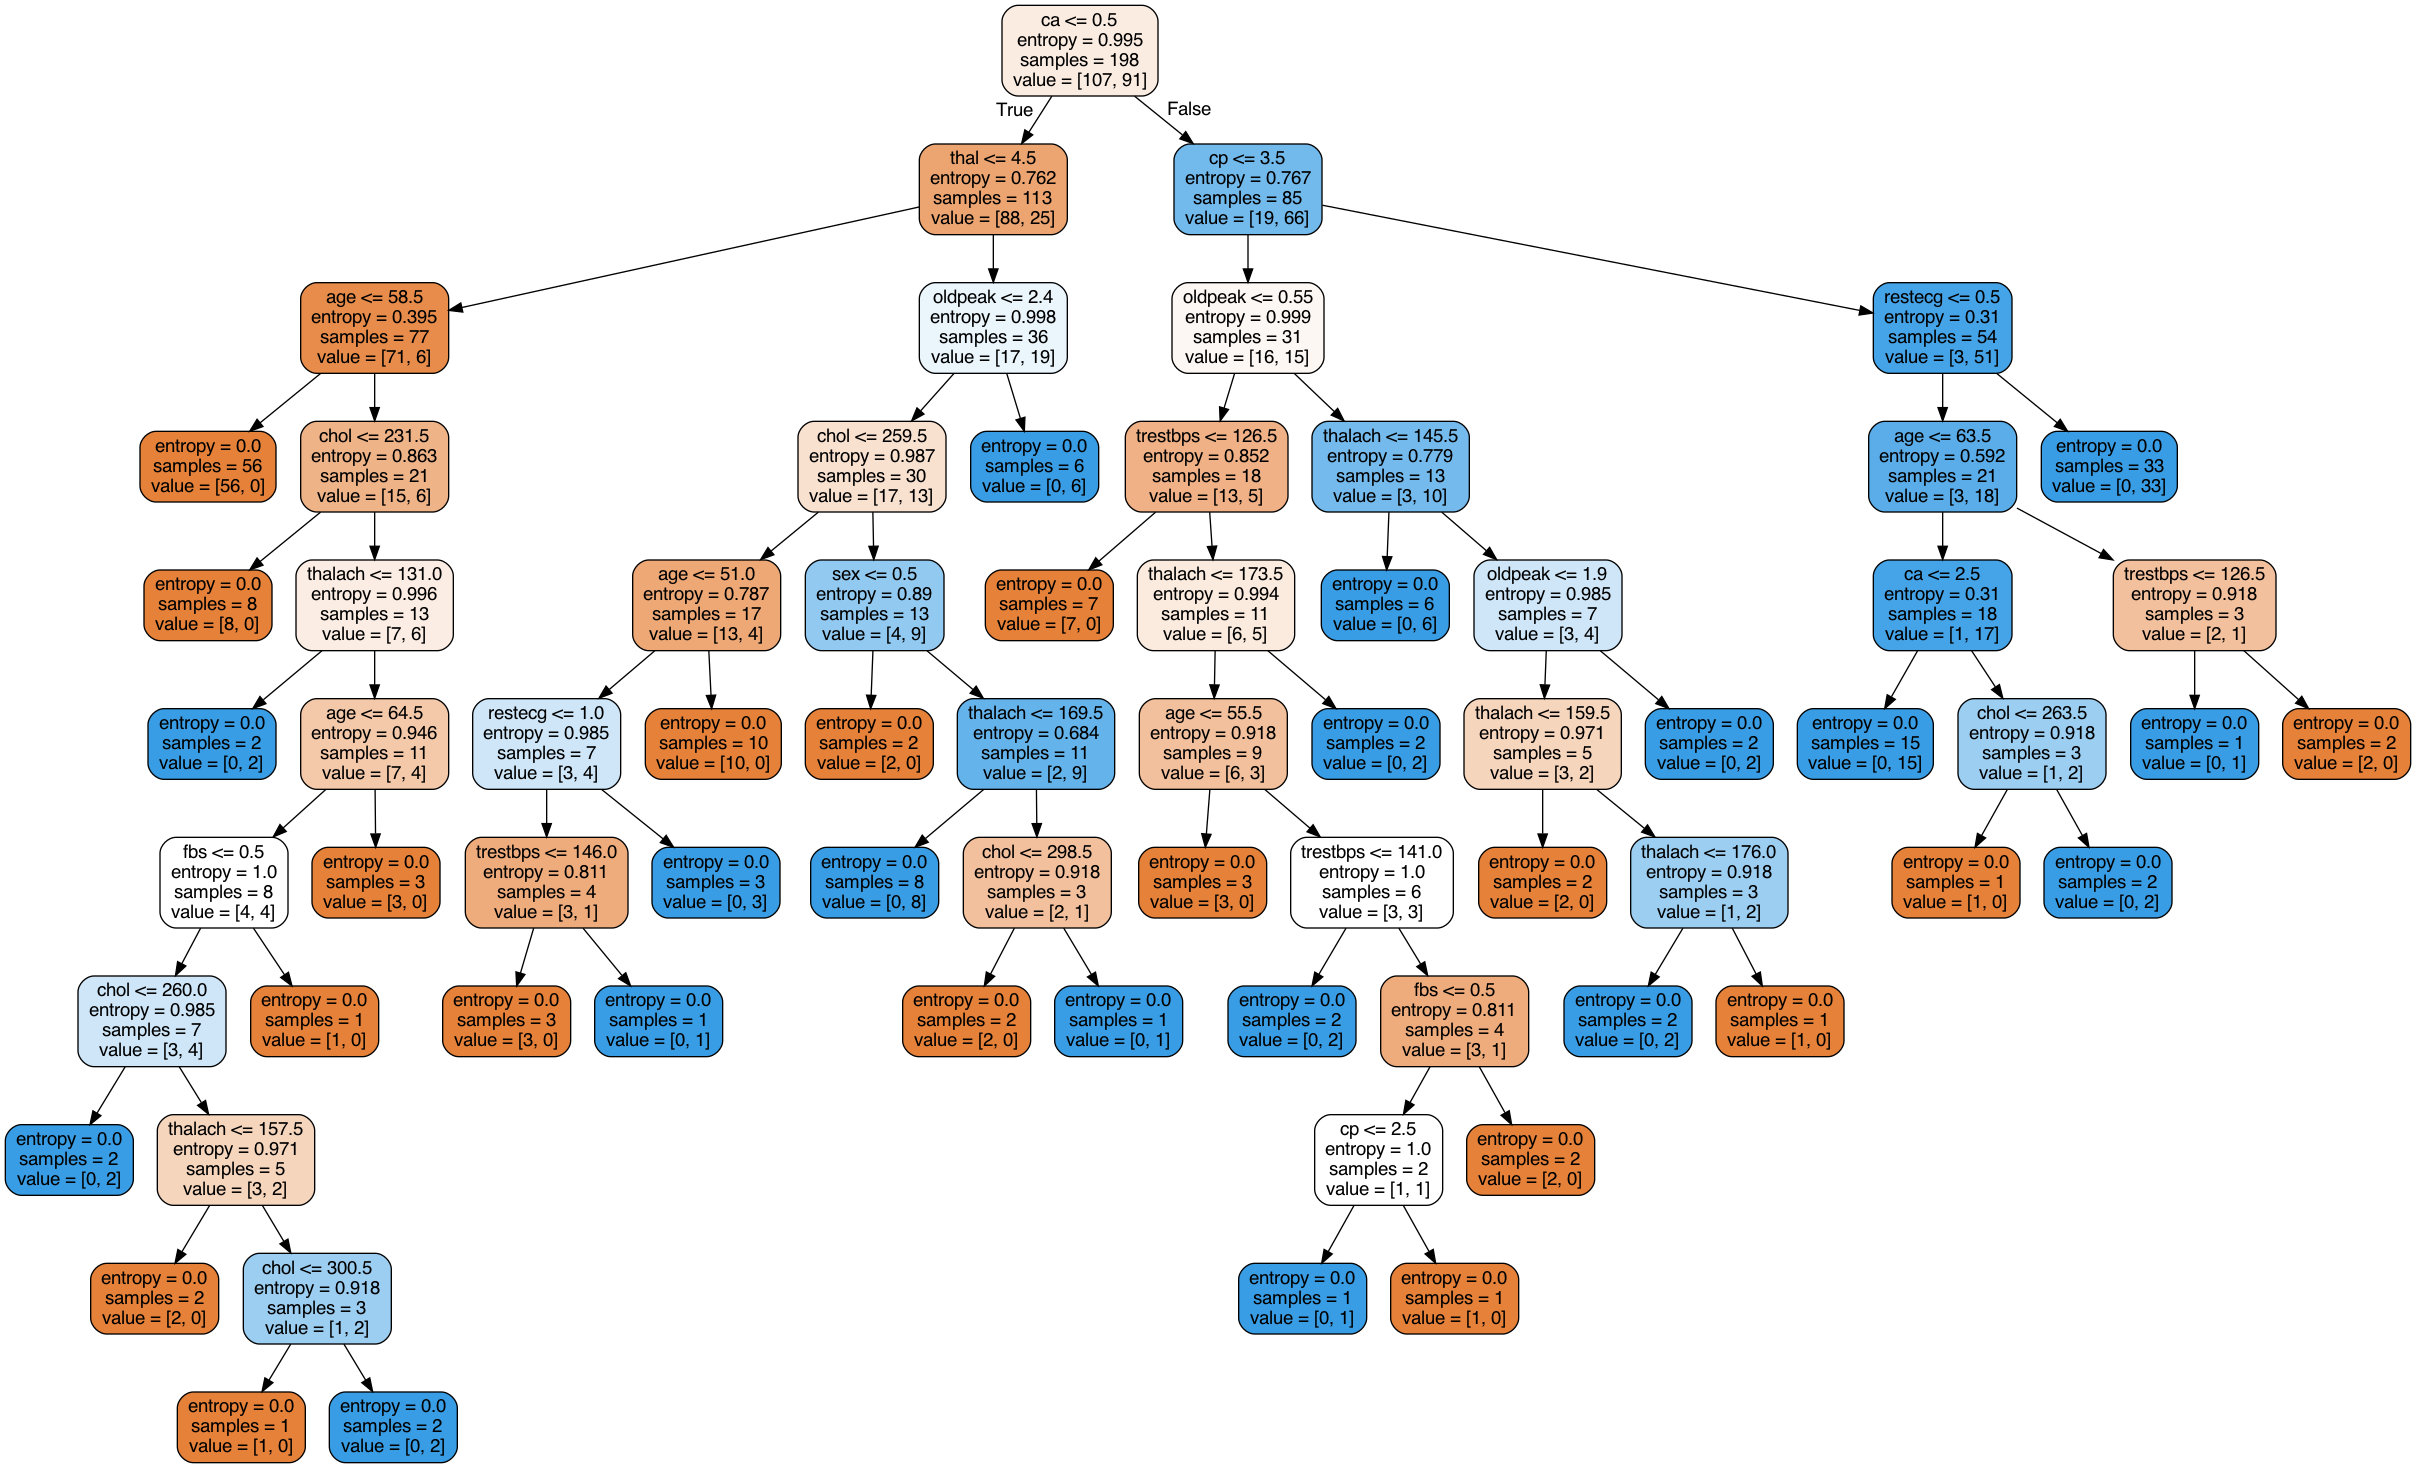

In [67]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data, feature_names=features_names, 
                filled=True, rounded=True) #max_depth=5 # try this and see the difference

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 
# Notice, in train dataset, we have in total 207 samples, same as in the root node (get the sum of value!)

## Tree visualization from our Random Forests  `rfc` model. 

***What if we want to visualize a tree from RandomForestClassifier, we need to grab a single tree. In the above model, we have used n_estimator = 100 means 100 trees, we can grab any one from them and visualize it. It's not convenient to visualize all trees in the RandomForestClassifier!***

In [68]:
# just to reconfirm the n_estimators
len(rfc.estimators_)

100

In [69]:
# Extract single tree (you can pass any number from 0 to 99)
single_tree = rfc.estimators_[30]

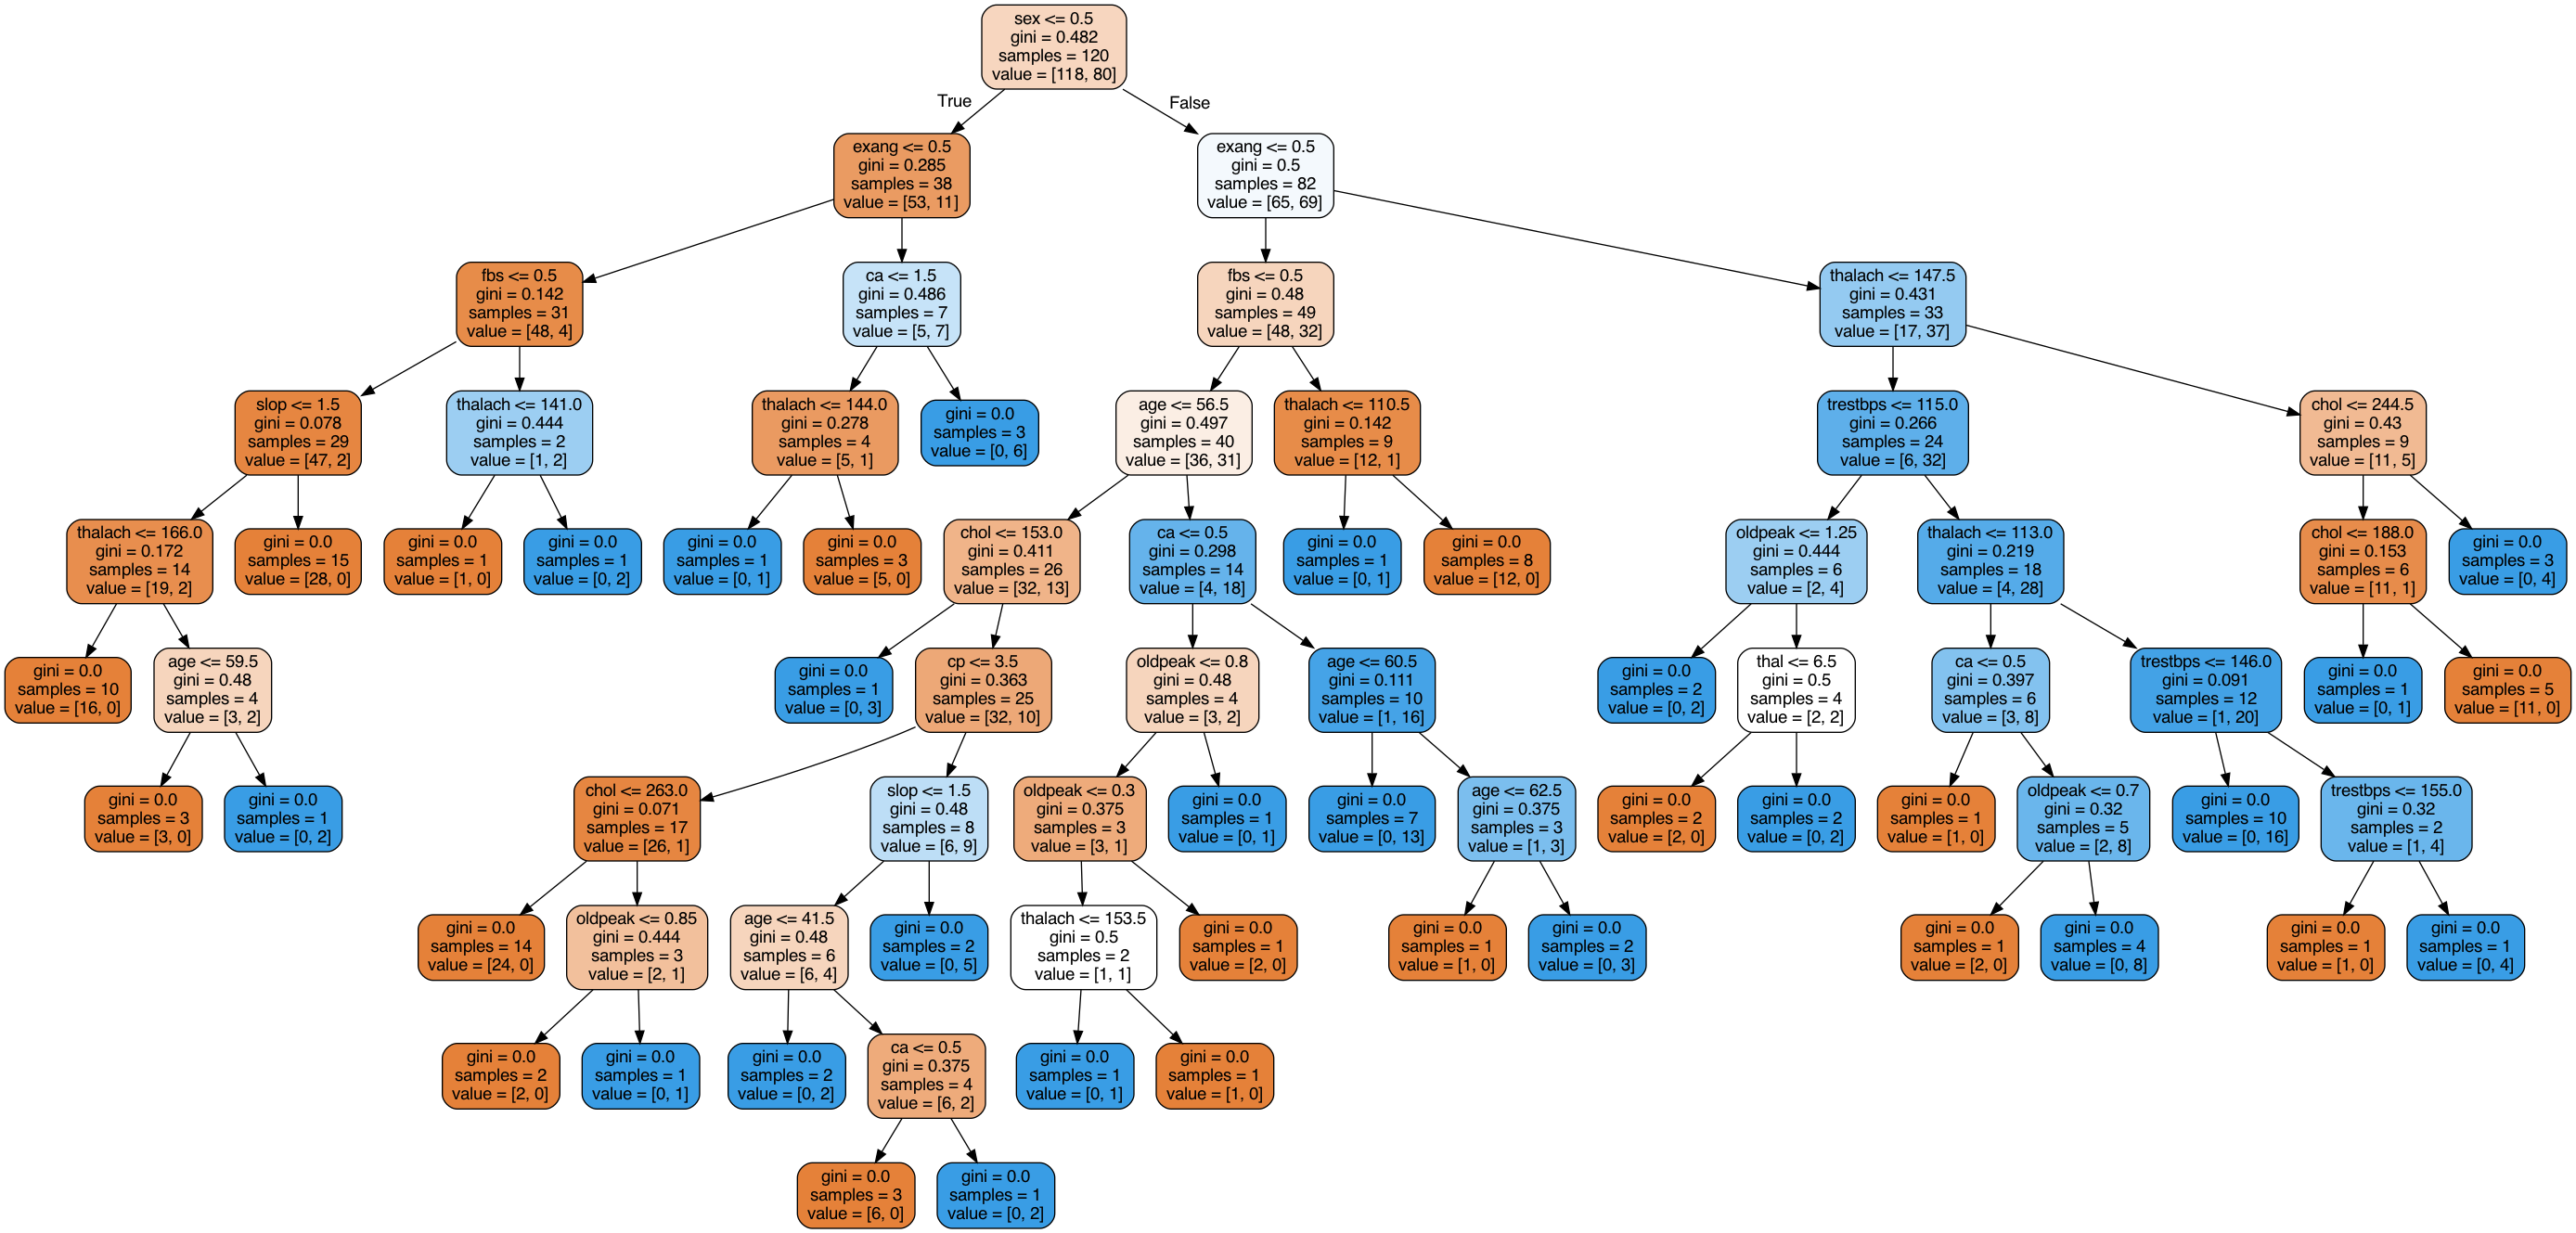

In [70]:
# The only change is single_tree instead of dtree!
dot_data = StringIO()  
export_graphviz(single_tree, out_file=dot_data, feature_names=features_names, filled=True, rounded=True) #max_depth=5

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# We bootstrapped the features, our datapoints will stay same. 
# For example in the root_node, we have in total 207 data points (same as in our training data)

**Excellent work!** So far, we have done great. Let's move on and do the project and practice our skills.

# Good Luck and Have Fun!

# Extra Reading and resources: 

* [**Data Science from Scratch -- Part 1: Advance Analytics**](https://leanpub.com/data-science-from-scratch)

* [**Data Science from Scratch -- Part 2: Business Machine Learning**](https://leanpub.com/datascience-from-scratch-p2-business-machine-learning/c/r1W4Bml3Zqr6)


## License

Author: [___Dr. Junaid Qazi___](https://www.linkedin.com/in/jqazi/)<br>
Twitter: [***@JunaidSQazi***](https://twitter.com/JunaidSQazi)

Copyright 2021

Licensed under the [Apache License, Version 2.0](http://www.apache.org/licenses/LICENSE-2.0) (the "License").<br>you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

*Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. Please see the License for the specific language governing permissions and limitations under the License.*


*This is not an official product but sample code provided for an educational purpose.*

***Acknowledgement is requested***